In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import joblib

# 🔹Step 1: Data Exploration

In [6]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#🔹 Step 2: Data Cleaning

In [8]:
df.drop_duplicates()       #remove duplictes
df.drop('CustomerID',axis=1,inplace=True)           #Drop unnecessary columns

# 🔹Step 3: Exploratory Data Analysis (EDA)

# 1-Descriptive statistics

In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# 2-Univariate Analysis

In [10]:
numerical_columns=['Age','Annual Income (k$)','Spending Score (1-100)']
categorical_column=['Gender']

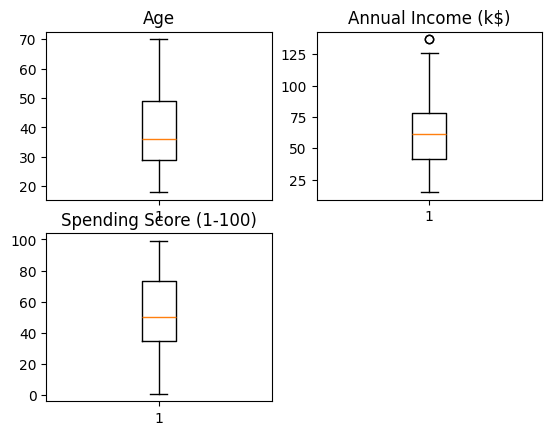

In [11]:
for i, col in enumerate(numerical_columns):
  plt.subplot(2,2,i+1)
  plt.boxplot(x=df[col])
  plt.title(col)

# 3-Categorical variable count

<Axes: xlabel='Gender', ylabel='count'>

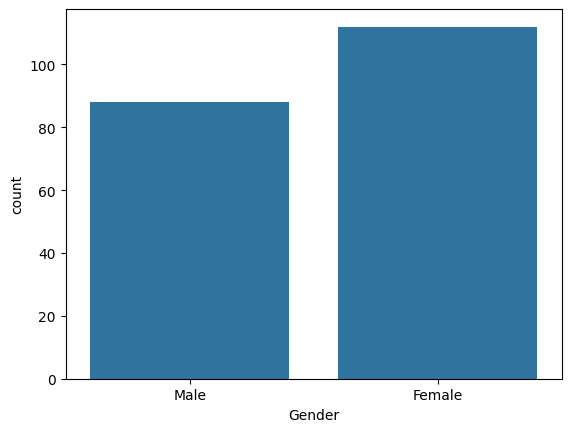

In [12]:
sns.countplot(x=categorical_column[0], data=df)

#4-Bivariate Analysis (relationships between features)

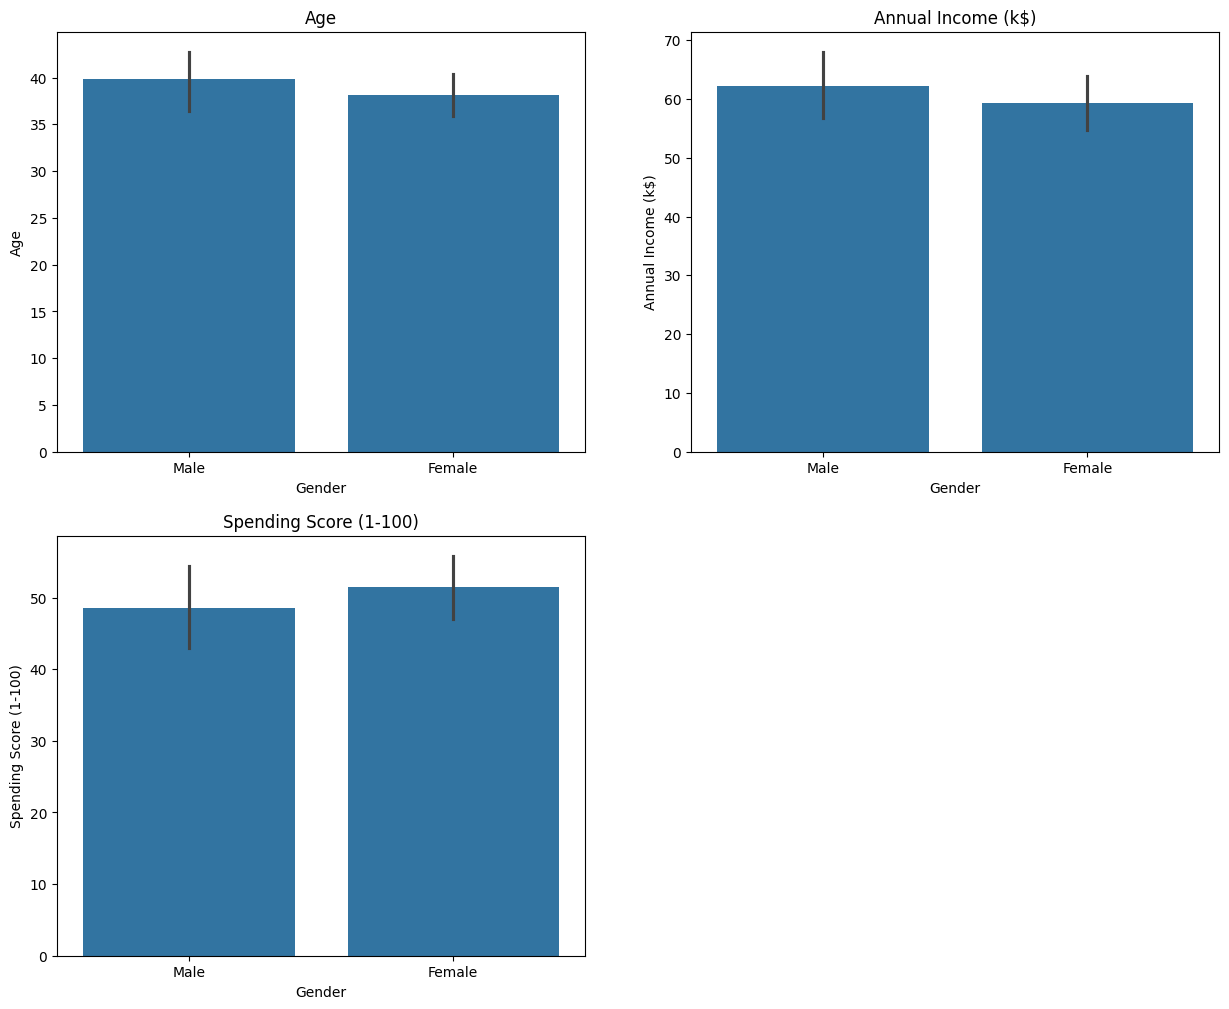

In [13]:
#relationship between numerical and gender
plt.figure(figsize=(15,12))
for i, col in enumerate(numerical_columns):
  plt.subplot(2,2,i+1)
  sns.barplot(x='Gender',y=col,data=df)
  plt.title(col)
plt.show()

#5- Boxplots(to see distribution per gender)

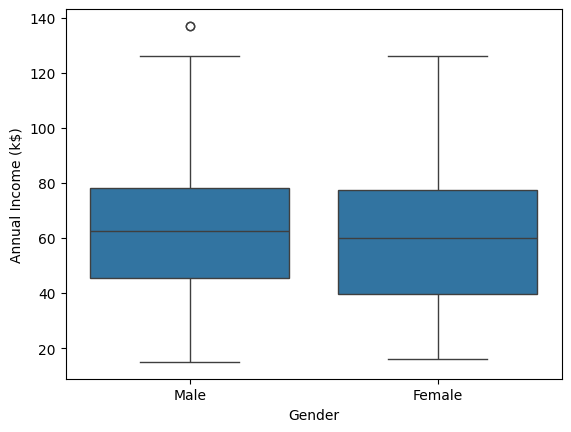

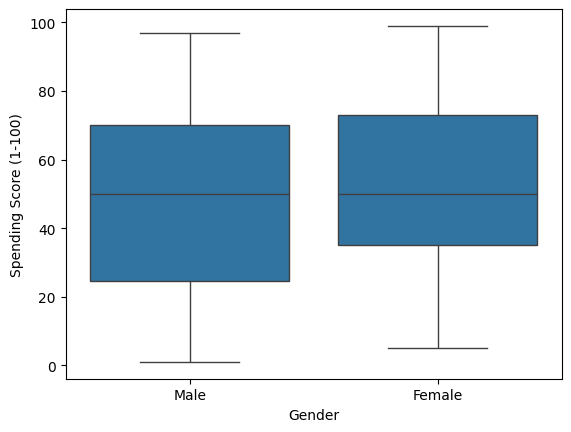

In [14]:
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)
plt.show()

sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.show()

#6- Corelation heatmap

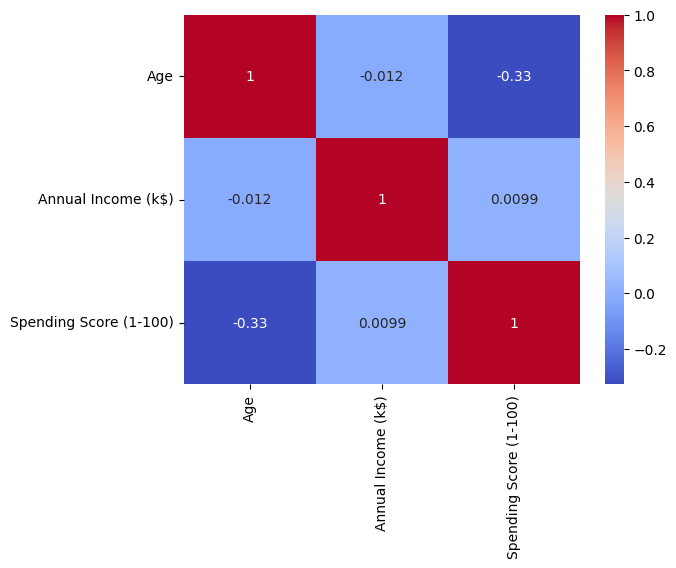

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

# 7- Pairwise Analysis

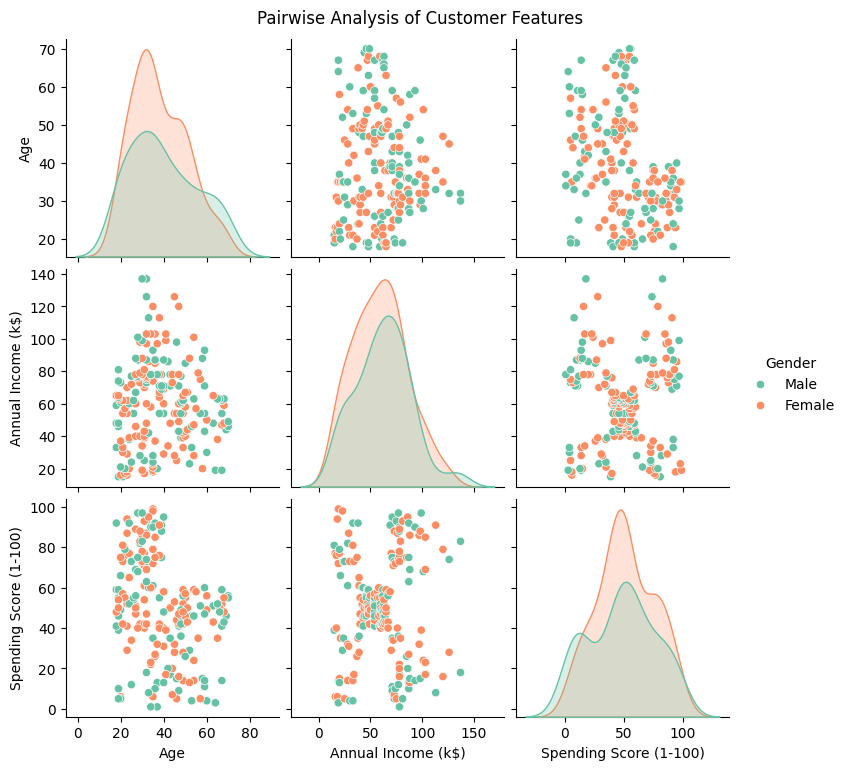

In [16]:
sns.pairplot(df, hue="Gender", diag_kind="kde", palette="Set2")
plt.suptitle("Pairwise Analysis of Customer Features", y=1.02)
plt.show()

# 4-Scaling and Encoding

In [17]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
scaler=StandardScaler()
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x_scaled=scaler.fit_transform(x)

# Training models

# Kmeans Algorithm

# Choose the best K: Elbow method or Silhouette score                   

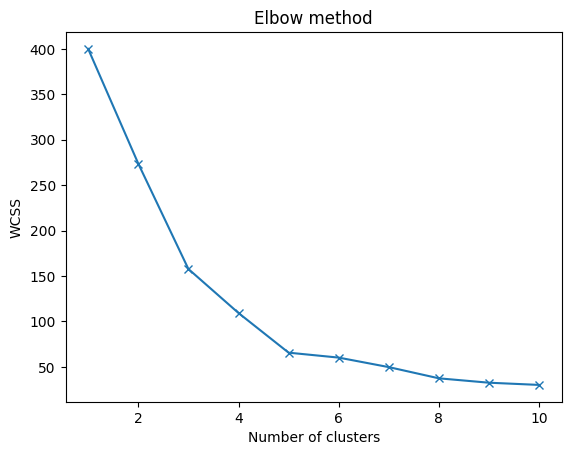

In [18]:
#choose the optimal number of clusters
#1-Elbow method
WCSS=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x_scaled)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1,11),WCSS,marker='x')
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.show()

In [19]:
# the bend in elbow methon when k=3 or 4 or 5, i am not sure, so i will use sillhoutte
#2-silhoutte score from k=3
scores={}
for k in range(2,7):
  kmeans=KMeans(n_clusters=k,random_state=42)
  labels=kmeans.fit_predict(x_scaled)
  score=silhouette_score(x_scaled,labels)
  scores[k]=score
  print(f"k={k}, silhouette score={score:.3f}")
best_k=max(scores,key=scores.get)
print(f"the best k is {best_k}, it's score is {scores[best_k]}")

k=2, silhouette score=0.397
k=3, silhouette score=0.467
k=4, silhouette score=0.494
k=5, silhouette score=0.555
k=6, silhouette score=0.514
the best k is 5, it's score is 0.5546571631111091


In [20]:
#use k=5
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(x_scaled)
labels_kmeans=kmeans.predict(x_scaled)
df['kmeans_cluster']=labels_kmeans

# DBSCAN Clustering

In [31]:
dbscan = DBSCAN(eps=0.4, min_samples=3)
labels_db = dbscan.fit_predict(x_scaled)

# Agglomerative Clustering

In [32]:
agg = AgglomerativeClustering(n_clusters=5)
labels_agg = agg.fit_predict(x_scaled)

# Choose the best Algorithm

In [33]:
#compare between three algorithms
print("kmeans's score:", silhouette_score(x_scaled,labels_kmeans))
print("DBSCAN's score:", silhouette_score(x_scaled,labels_db))
print("Agglomerative's score:", silhouette_score(x_scaled,labels_agg))

kmeans's score: 0.5546571631111091
DBSCAN's score: 0.3626911889159071
Agglomerative's score: 0.5538089226688662


# Kmeans as the best Algorithm

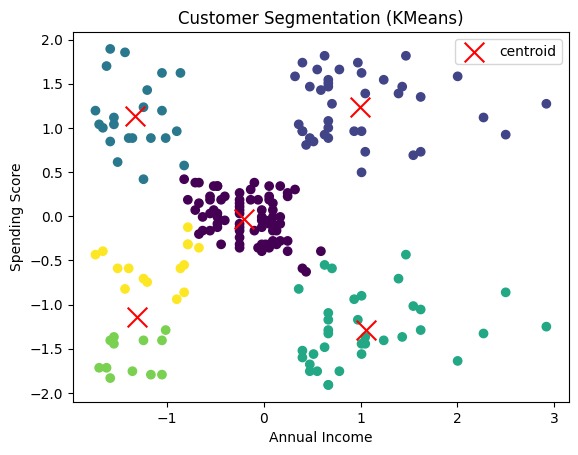

In [24]:
#plot income vs spending score and centroids
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=labels)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='x',label='centroid',s=200)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation (KMeans)")
plt.legend()
plt.show()

In [25]:
print(df.groupby('kmeans_cluster')[['Annual Income (k$)','Spending Score (1-100)','Age']].mean())

                Annual Income (k$)  Spending Score (1-100)        Age
kmeans_cluster                                                       
0                        55.296296               49.518519  42.716049
1                        86.538462               82.128205  32.692308
2                        25.727273               79.363636  25.272727
3                        88.200000               17.114286  41.114286
4                        26.304348               20.913043  45.217391


In [26]:
def segmentation(cluster):
  if cluster==0:
    return "Average Customers"
  elif cluster==1:
    return "VIP customers"
  elif cluster==2:
    return "Low Income, High Spending"
  elif cluster==3:
    return "High Income, Low Spending"
  elif cluster==4:
    return "Low Value Customers"
df['customer segments']=df['kmeans_cluster'].apply(segmentation)
insights=df.groupby('customer segments')[['Annual Income (k$)','Spending Score (1-100)','Age']].mean()
insights=insights.reset_index()
insights=insights.melt(id_vars="customer segments",value_vars=['Annual Income (k$)','Spending Score (1-100)','Age'],
                            value_name="Avarage",var_name="Feature")

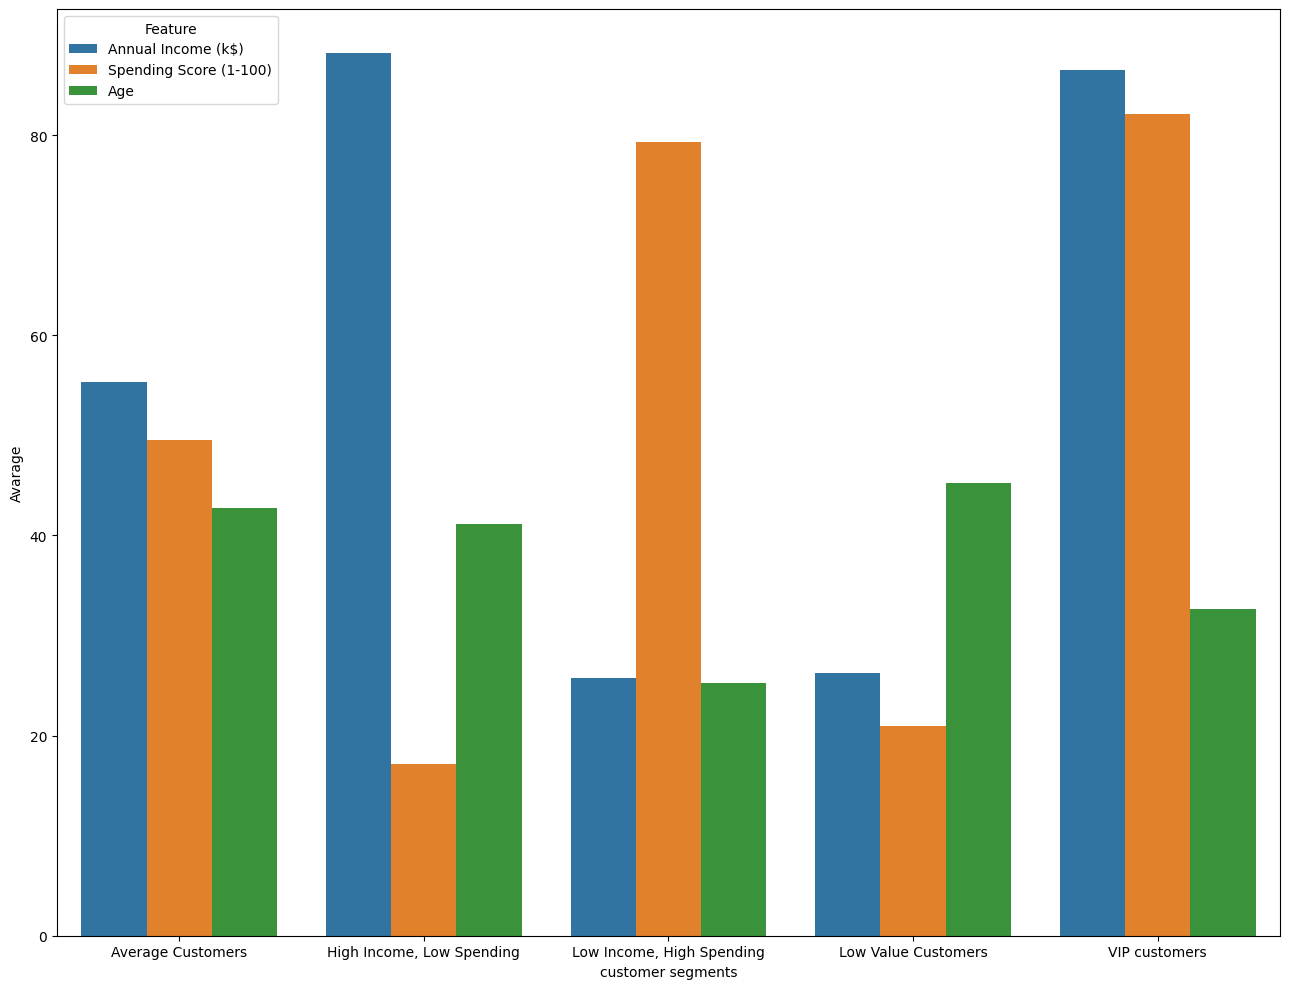

In [27]:
#clusters visualization
plt.figure(figsize=(13,10))
sns.barplot(x='customer segments',y="Avarage",hue='Feature',data=insights)
plt.tight_layout()

# Save the model

In [29]:
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']